First, download medical_mnist.zip from
https://www.dropbox.com/sh/f5xhsxa8njo144w/AADvbT9UOem2D0xTPACTUQ-fa?dl=0
unzip the data to Exercise2 / Data / medical_mnist

import all the helper functions

In [1]:
from utils_mnist import *

/Users/garychang/opt/anaconda3/envs/CourseML/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
class Trainer():
    def __init__(self, args, train_loader, validation_loader, model, loss_function, optimizer):
        pass

    def overall_loop(self):
        for epoch in range(args['num_epochs']):
            train_loss = self.training_loop(train_loader)  # do the training look
            validation_loss = self.validation_loop(validation_loader) # do the validation loop
            # print out the training and validation loss per epoch
            print('Epoch [{}/{}], Train Loss: {:.4f}, Validation Loss: {:.4f}'
                  .format(epoch + 1, args['num_epochs'],
                          sum(train_loss) / len(train_loss), sum(validation_loss) / len(validation_loss)))

    def training_loop(self, train_loader):
        train_loss = []
        for i, train_batch in enumerate(train_loader):  # get mini-bacthes from the train_loader
            loss = self.training_step(train_batch) # get the train loss from the train_step
        train_loss.append(loss.item()) # add the train_loss up
        return train_loss

    def validation_loop(self, validation_loader):
        validation_loss = []
        for i, validation_batch in enumerate(validation_loader):
            loss = self.validation_step(validation_batch)
        validation_loss.append(loss.item())
        return validation_loss

    def training_step(self, train_batch):
        (images, labels) = train_batch
        images = images.reshape(-1, args['img_size'])  # turn the 2D image to a 1D feature (flatten)

        # Forward pass
        outputs = model(images)  # get the model output
        loss = loss_function(outputs, labels) # calculate the loss

        # Magic section where we do optimization by backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        return loss

    def validation_step(self, validation_batch):
        (images, labels) = validation_batch
        images = images.reshape(-1, args['img_size'])

        # Forward pass
        outputs = model(images)  # get the model output
        loss = loss_function(outputs, labels) # calculate the loss
        return loss

define all the arguments (hyperparameters)

In [3]:
# arguments
def get_arguments():
    # Hyper-parameters
    args = {'img_size': 64 * 64,
            'num_classes': 10,
            'num_epochs': 50,
            'batch_size': 16,
            'learning_rate': 0.001,
            'model': 'MLP'}
    return args

args = get_arguments()
print(args)

{'img_size': 4096, 'num_classes': 10, 'num_epochs': 50, 'batch_size': 16, 'learning_rate': 0.001, 'model': 'MLP'}


In [4]:
# Medical MNIST dataset (images and labels)
train_loader, validation_loader = get_medical_mnist(args=args)
print('Done with data preparation')

Done with data preparation


In [5]:
print('Length of train dataset:')
print(len(train_loader.dataset))
print('Length of validation dataset:')
print(len(validation_loader.dataset))
print('Length of train dataloader:')
print(len(train_loader))
print('Length of validation dataloader:')
print(len(validation_loader))
print('Why is that?')

Length of train dataset:
35000
Length of validation dataset:
15000
Length of train dataloader:
2188
Length of validation dataloader:
938
Why is that?


Let's look at some images

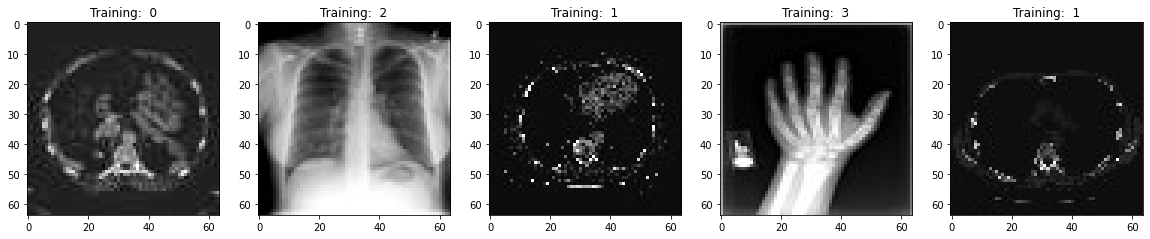

In [6]:
some_index = np.random.randint(0, len(train_loader.dataset), 10)
some_imgs = [train_loader.dataset.__getitem__(idx)[0] for idx in some_index]
some_labels = [train_loader.dataset.__getitem__(idx)[1] for idx in some_index]

show_examples(some_imgs[:5], some_labels[:5])

In [7]:
# get model
if args['model'] == 'logistic_regression':
    print('Using logistic regression')
    model = nn.Linear(args['img_size'], args['num_classes'])
elif args['model'] == 'MLP':
    print('MLP')
    model = MLP(dropout=0, hidden_1=512, hidden_2=512)

MLP


In [8]:
# Loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=args['learning_rate'])

Lets build the trainer together

In [9]:
trainer = Trainer(args, train_loader, validation_loader, model, loss_function, optimizer)

Start the training!

In [10]:
trainer.overall_loop()

Epoch [1/50], Train Loss: 0.4119, Validation Loss: 0.6364
Epoch [2/50], Train Loss: 0.2916, Validation Loss: 0.4884
Epoch [3/50], Train Loss: 0.0422, Validation Loss: 0.4543
Epoch [4/50], Train Loss: 0.0321, Validation Loss: 0.4284
Epoch [5/50], Train Loss: 0.1267, Validation Loss: 0.3798
Epoch [6/50], Train Loss: 0.0371, Validation Loss: 0.3613
Epoch [7/50], Train Loss: 0.0178, Validation Loss: 0.3600
Epoch [8/50], Train Loss: 0.0553, Validation Loss: 0.3282
Epoch [9/50], Train Loss: 0.0289, Validation Loss: 0.3091
Epoch [10/50], Train Loss: 1.7916, Validation Loss: 0.2942
Epoch [11/50], Train Loss: 0.0282, Validation Loss: 0.2790
Epoch [12/50], Train Loss: 0.0727, Validation Loss: 0.2557
Epoch [13/50], Train Loss: 0.2577, Validation Loss: 0.2372
Epoch [14/50], Train Loss: 0.0517, Validation Loss: 0.2355
Epoch [15/50], Train Loss: 0.0158, Validation Loss: 0.2012
Epoch [16/50], Train Loss: 0.0080, Validation Loss: 0.1992
Epoch [17/50], Train Loss: 0.2431, Validation Loss: 0.1984
Epoch 

Calculating validation accuracy

In [11]:
correct = 0
total = 0
for images, labels in validation_loader:
    images = images.reshape(-1, args['img_size'])
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the model on the 10000 test images: 99.36000061035156 %
